##  Identify the sentiments : Practice project
### Train the tweet data to predict sentiment on electronic products of netizens

- Contextual mining of text 
- Identify and extract subjective information
- Help business to understand the social sentiment of their brand, product or service while monitoring online conversations. 
- Brands can use this data to measure the success of their products in an objective manner. 


#### Import dependencies

In [34]:
import pandas as pd
import re
import matplotlib.pyplot as plt

## Read the dataset

In [8]:
# Read the train dataset

traindata = pd.read_csv("resources/train_2kmZucJ.csv")
traindata

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...


In [18]:
# Read the test dataset

testdata = pd.read_csv("resources/test_oJQbWVk.csv")
testdata

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...
...,...,...
1948,9869,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old..."
1949,9870,Now Available - Hoodie. Check it out here - ht...
1950,9871,There goes a crack right across the screen. If...
1951,9872,@codeofinterest as i said #Adobe big time we m...


### Check out the data distribution

In [13]:
# Check out the tweets which are labelled 1
traindata[traindata["label"]==1].head(10)

,id,label,tweet
4,5,1,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...
10,11,1,hey #apple when you make a new ipod dont make ...
11,12,1,Ha! Not heavy machinery but it does what I nee...
12,13,1,Contemplating giving in to the iPhone bandwago...
14,15,1,@shaqlockholmes @sam_louise1991 the battery is...
18,19,1,The reason I don't have one. #iphone #suck #ap...
19,20,1,How is the apple store gunna be out of 5C scre...
22,23,1,I've had this new ipod for four days? And this...
23,24,1,when your iPhone screen goes completely black ...


In [14]:
# Check out tweets which are labelled 0
traindata[traindata["label"]==0].head(10)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
6,7,0,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...
13,14,0,I just made another crazy purchase lol my theo...
15,16,0,From #DeepEllum towards #downtown #Dallas. #Bi...


### Description
- **Label** :  The target variable which has to be predicted.
    - Label 1 : Refers to negative review
    - Label 0 : Refers to positive review
- **Tweet** :  The tweet statements which is the main data that need to be cleaned and analysed

In [21]:
# Check out the dimensions of the tweet data
traindata.shape,  testdata.shape

((7920, 3), (1953, 2))

* Train dataset has 7920 tweets
* Test dataset has 1953 tweets

In [23]:
# Check out the labelled data distribution in the training dataset

traindata["label"].value_counts()

0    5894
1    2026
Name: label, dtype: int64

* The training dataset has 5894 reviews which are positive and 2026 negative reviews

In [45]:
# Check the tweet lengths in both train and test datasets

len_train = traindata["tweet"].str.len()
len_test = testdata["tweet"].str.len()
len_train, len_test

(0       128
 1       131
 2       123
 3       112
 4       124
        ... 
 7915    107
 7916    134
 7917    129
 7918    133
 7919    129
 Name: tweet, Length: 7920, dtype: int64,
 0        77
 1       115
 2       104
 3       129
 4        70
        ... 
 1948    188
 1949    184
 1950    131
 1951     74
 1952    113
 Name: tweet, Length: 1953, dtype: int64)

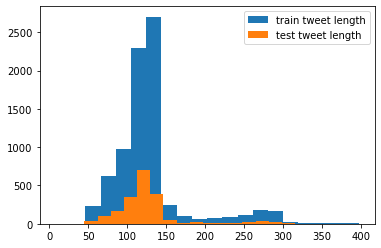

In [42]:
# Draw a histogram to plot the tweet lengths
plt.hist(len_train, bins=20, label = "train tweet length")
plt.hist(len_test, bins=20, label = "test tweet length")
plt.figsize = (18,12)
plt.legend()
plt.show()

tweet length is almost same for both train and test data

In [9]:
for index, tweet in enumerate(traindata["tweet"][10:15]):
    print(index+1, ".", tweet)

1 . hey #apple when you make a new ipod dont make it a new color or .2inches thinner make it not crash every five fuckin minite.
2 . Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade
3 . Contemplating giving in to the iPhone bandwagon simply because #Cellcom has no new Androids #depressing #IDontWantTo
4 . I just made another crazy purchase lol my theory is 'Work hard, Play Hard' Lol #iPad #Apple #Shopping http://instagr.am/p/NUyFHvyE7I/
5 . @shaqlockholmes @sam_louise1991 the battery is so painful! I charge it overnight and by lunchtime battery is dead! #HateOrange.
